In [1]:
# import os
# import warnings
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import datetime as dt
# import math

# from pandas.plotting import autocorrelation_plot
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.preprocessing import MinMaxScaler
# from common.utils import load_data, mape
# from IPython.display import Image

# %matplotlib inline
# pd.options.display.float_format = '{:,.2f}'.format
# np.set_printoptions(precision=2)
# warnings.filterwarnings("ignore") # specify to ignore warning messages

import pandas as pd

# Load the dataset
fp = 'energy.csv'
data = pd.read_csv(fp)

# Display the first few rows of the dataset and its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  26304 non-null  object 
 1   load       26304 non-null  float64
 2   temp       26304 non-null  float64
dtypes: float64(2), object(1)
memory usage: 616.6+ KB


(             timestamp    load       temp
 0  2012-01-01 00:00:00  2698.0  32.000000
 1  2012-01-01 01:00:00  2558.0  32.666667
 2  2012-01-01 02:00:00  2444.0  30.000000
 3  2012-01-01 03:00:00  2402.0  31.000000
 4  2012-01-01 04:00:00  2403.0  32.000000,
 None)

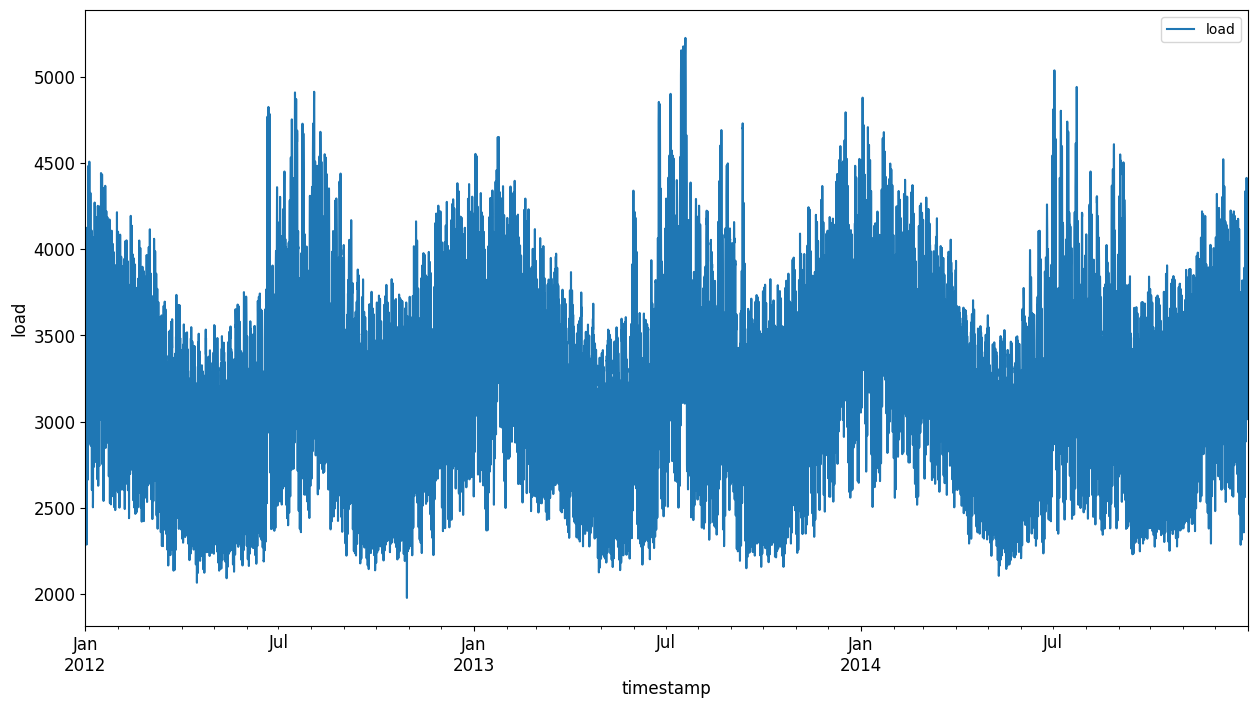

In [4]:
import matplotlib.pyplot as plt
data.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [5]:
#need to ensure that the test set covers a later period in time from the training set to ensure that the model does not gain information from future time periods.
# Allocate a two-month period from September 1 to October 31, 2014 to the training set. The test set will include the two-month period of November 1 to December 31, 2014
train_start_dt = '2014-11-01 00:00:00'
test_start_dt = '2014-12-30 00:00:00'

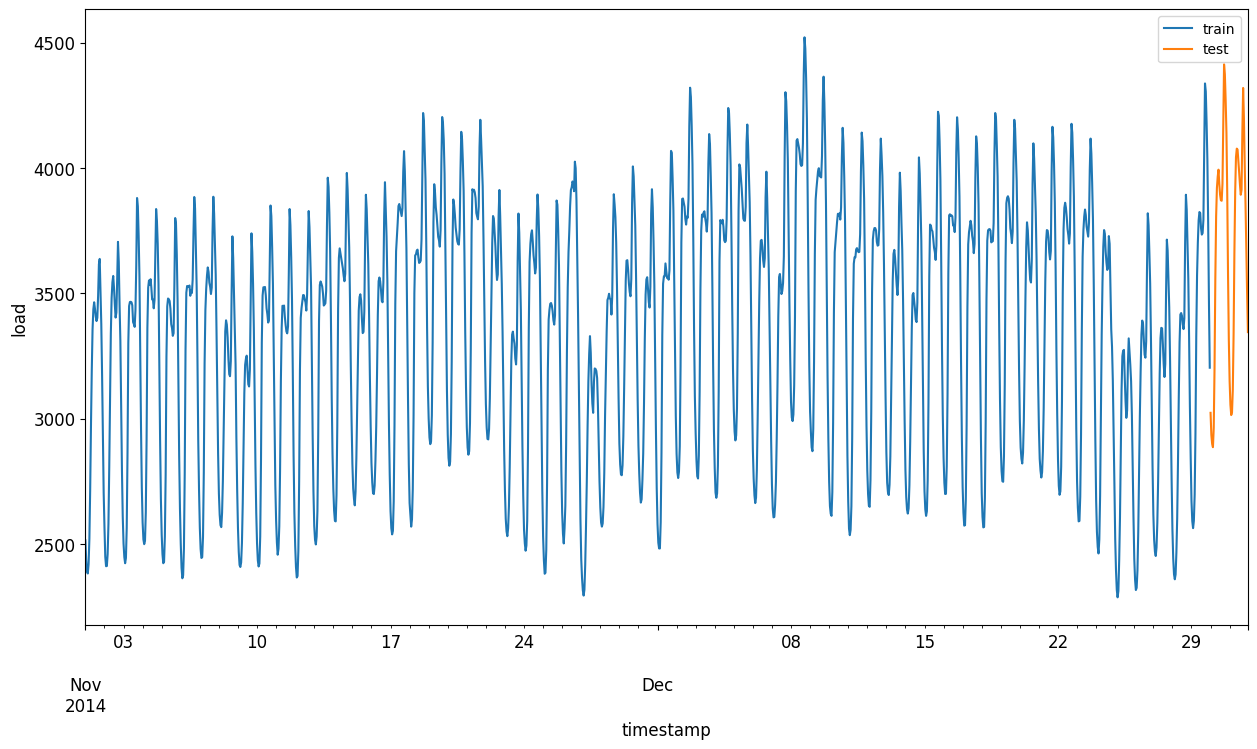

In [6]:
data[(data.index < test_start_dt) & (data.index >= train_start_dt)][['load']].rename(columns={'load': 'train'}).join(data[test_start_dt: ][['load']].rename(columns={'load': 'test'}), how='outer').plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [7]:
#Filter the original dataset to include only 
# the aforementioned time periods per set and only including the needed column 'load' plus the date
train = data.copy()[(data.index >= train_start_dt) & (data.index < test_start_dt)][['load']]
test = data.copy()[data.index >= test_start_dt][['load']]

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)

Training data shape:  (1416, 1)
Testing data shape:  (48, 1)


In [8]:
#scale data to be in range(0, 1)
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train['load'] = sc.fit_transform(train)
train.head(10)

load
timestamp                    
2014-11-01 00:00:00  0.101611
2014-11-01 01:00:00  0.065801
2014-11-01 02:00:00  0.046106
2014-11-01 03:00:00  0.042525
2014-11-01 04:00:00  0.059087
2014-11-01 05:00:00  0.104297
2014-11-01 06:00:00  0.191137
2014-11-01 07:00:00  0.305730
2014-11-01 08:00:00  0.403760
2014-11-01 09:00:00  0.478514

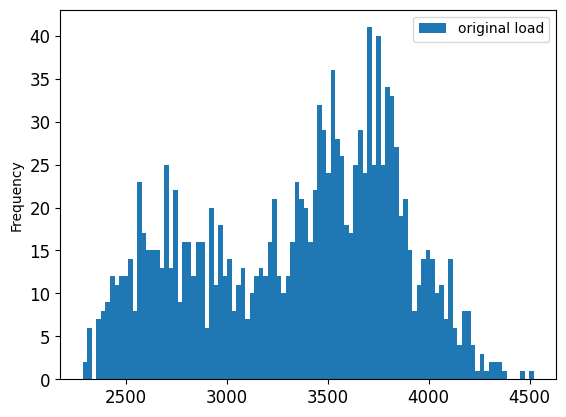

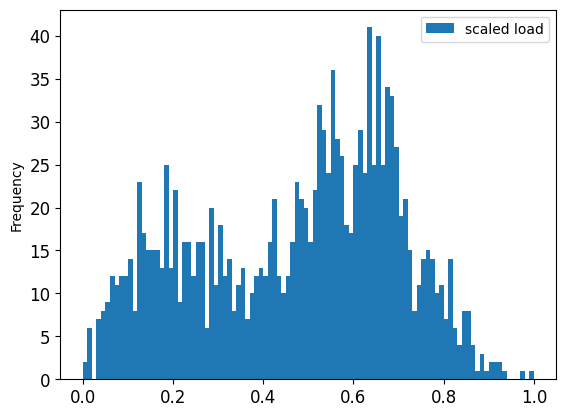

In [9]:
#visualize og vs scaled data
data[(data.index >= train_start_dt) & (data.index < test_start_dt)][['load']].rename(columns={'load': 'original load'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={'load': 'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [10]:
test['load'] = sc.transform(test)
test.head()

load
timestamp                    
2014-12-30 00:00:00  0.329454
2014-12-30 01:00:00  0.290063
2014-12-30 02:00:00  0.273948
2014-12-30 03:00:00  0.268129
2014-12-30 04:00:00  0.302596

In [1]:
frcst = 3
print("Forecasting horizon: ", frcst, " hours")

Forecasting horizon:  3  hours
